In [ ]:
import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns

In [2]:
nab_url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv"
local_file = "ec2_cpu_utilization_825cc2.csv"

In [ ]:
if not os.path.exists(local_file):
    print("Baixando dataset NAB AWS CPU...")
    urllib.request.urlretrieve(nab_url, local_file)
    print("Download feito")

df = pd.read_csv(local_file, parse_dates=['timestamp'])
df = df.set_index('timestamp')
data = df['value'].values

data_min = np.min(data)
data_max = np.max(data)
data_norm = (data - data_min) / (data_max - data_min)
window_size = 30

In [4]:
def create_windows(data, size):
    windows = []
    for i in range(len(data) - size):
        windows.append(data[i:i+size])
    return np.array(windows)
windows = create_windows(data_norm, window_size)
windows = windows[..., np.newaxis]  
latent_dim = 20

def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(50, activation='relu', input_dim=latent_dim),
        layers.Dense(window_size, activation='sigmoid'),
        layers.Reshape((window_size, 1))
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(window_size,1)),
        layers.Dense(50, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_window = generator(gan_input)
gan_output = discriminator(generated_window)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

C:\Users\genov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\genov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
batch_size = 32
epochs = 1000
half_batch = batch_size // 2

for epoch in range(epochs):
    idx = np.random.randint(0, windows.shape[0], half_batch)
    real_windows = windows[idx]
    real_labels = np.ones((half_batch, 1))

    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    fake_windows = generator.predict(noise)
    fake_labels = np.zeros((half_batch, 1))

    d_loss_real = discriminator.train_on_batch(real_windows, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_windows, fake_labels)
    d_loss = 0.5 * (d_loss_real + d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs} - D loss: {d_loss:.4f} - G loss: {g_loss:.4f}")

scores = discriminator.predict(windows)
scores = scores.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


C:\Users\genov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\backend\tensorflow\trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

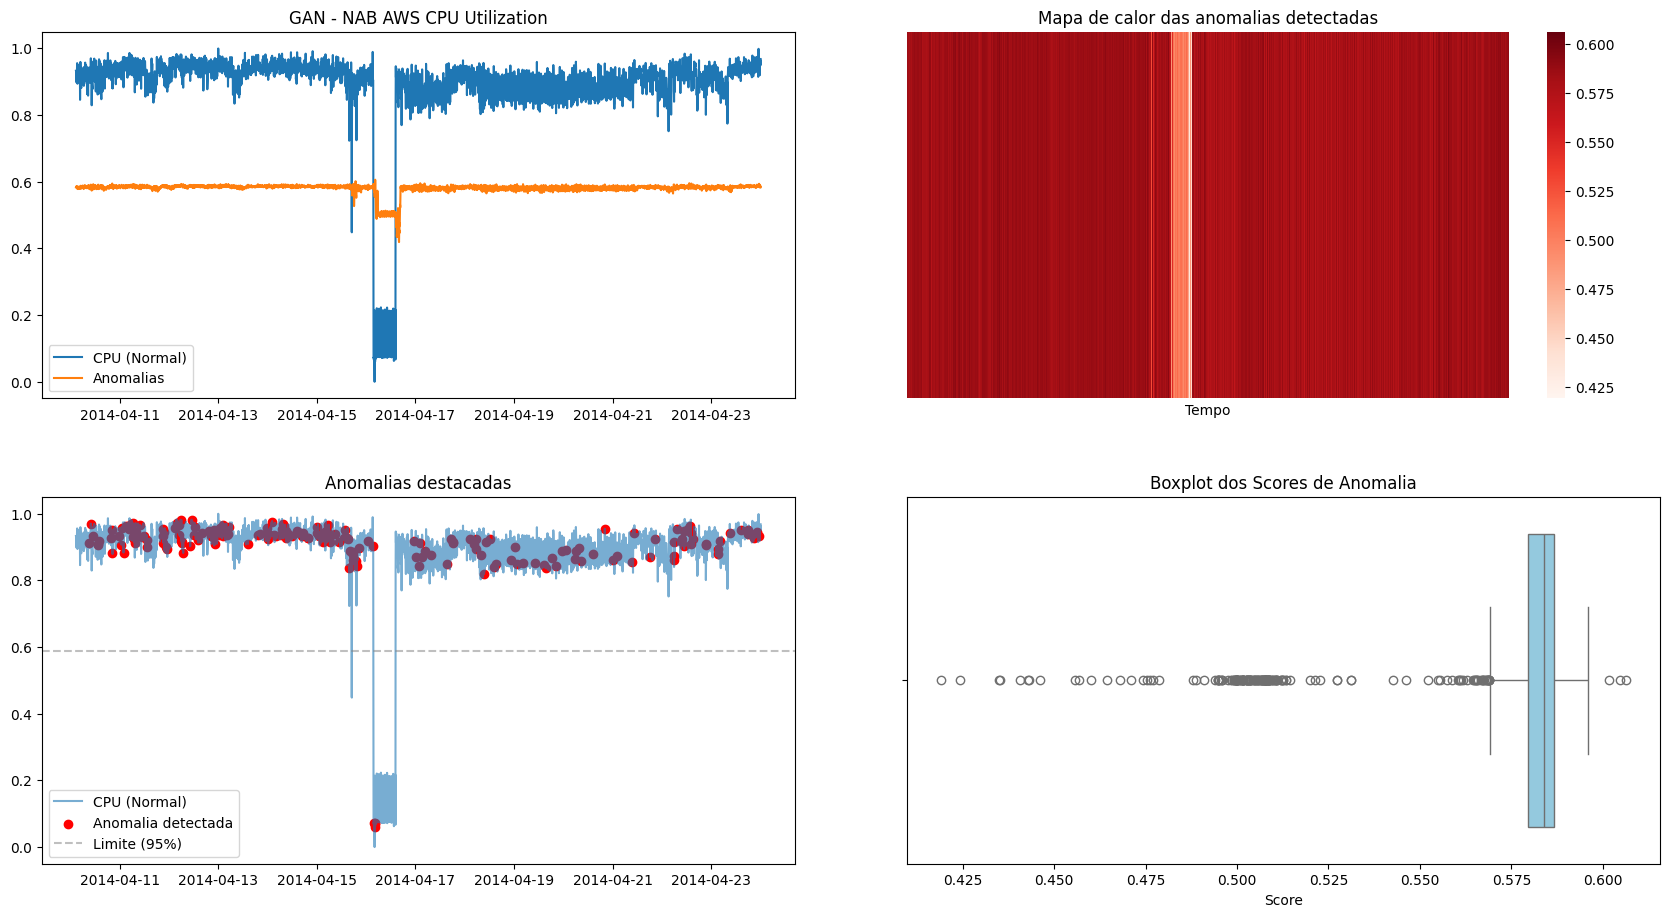

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.tight_layout(pad=5.0)
axes[0, 0].plot(df.index[window_size:], data_norm[window_size:], label='CPU (Normal)')
axes[0, 0].plot(df.index[window_size:], scores, label='Anomalias')
axes[0, 0].set_title("GAN - NAB AWS CPU Utilization")
axes[0, 0].legend()

sns.heatmap(scores.reshape(1, -1), cmap='Reds', cbar=True, xticklabels=False, yticklabels=False, ax=axes[0, 1])
axes[0, 1].set_title("Mapa de calor das anomalias detectadas")
axes[0, 1].set_xlabel("Tempo")

threshold = np.percentile(scores, 95)
anomalias = scores > threshold
axes[1, 0].plot(df.index[window_size:], data_norm[window_size:], label='CPU (Normal)', alpha=0.6)
axes[1, 0].scatter(df.index[window_size:][anomalias], data_norm[window_size:][anomalias], color='red', label='Anomalia detectada')
axes[1, 0].axhline(threshold, color='gray', linestyle='--', alpha=0.5, label='Limite (95%)')
axes[1, 0].legend()
axes[1, 0].set_title("Anomalias destacadas")

sns.boxplot(x=scores, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title("Boxplot dos Scores de Anomalia")
axes[1, 1].set_xlabel("Score")

plt.show()
